### 데이터 읽기 및 확인

In [1]:
import numpy as np
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [2]:
customer = pd.read_csv('customer_join.csv', encoding='cp949')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

### 클러스터링으로 회원을 그룹화

In [49]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [3]:
# 한 달에 이용한 횟수의 평균, 중위값, 가장 큰 값, 가장 작은 값
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [5]:
# 데이터 표준화 (평균 : 0, 표준편차 : 1)
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [6]:
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [7]:
# KMeans : 중심점을 반복적으로 업데이트하며 군집을 만든다
# n_clusters : n개의 군집으로 만들기
kmeans = KMeans(n_clusters=4, random_state=0)

In [8]:
clusters = kmeans.fit(customer_clustering_sc)

In [9]:
customer_clustering.loc[ : , "cluster"] = clusters.labels_

C:\Users\YoonSunJun\AppData\Local\Temp\ipykernel_2476\1547334212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering.loc[ : , "cluster"] = clusters.labels_


In [10]:
print(customer_clustering["cluster"].unique())

[2 1 0 3]


In [11]:
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


### 클러스터링 결과 분석

In [12]:
customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [13]:
# 0 집단은 회원기간을 제외하면 2 집단과 비슷한 값을 보여준다
# 1 집단은 회원기간이 두번 째로 짧고 나머지 값들이 다 낮은 모습
# 2 집단은 회원기간이 가장 긴 모습 
# 3 집단은 회원기간이 가장 짧지만 값들이 다 높은 모습
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,5.541974,5.392804,8.757871,2.704648,14.857571
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,4.677561,4.670937,7.233787,2.153723,36.915933
3,8.064079,8.050716,10.014320,6.180191,7.016706


In [14]:
# 주성분 분석
from sklearn.decomposition import PCA

In [15]:
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [16]:
# transform: 학습된 PCA 모델을 사용하여 원본 데이터를 변환합니다. 주성분 방향으로 데이터를 재배치합니다.
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

In [53]:
pca_df

,0,1,cluster
0,-0.819982,1.959097,2
1,-0.707922,1.799857,2
2,-1.061499,1.659826,2
3,-1.160764,1.810139,2
4,-2.017132,1.670101,2
...,...,...,...
4187,3.027933,-1.139635,3
4188,5.064720,-0.769684,3
4189,3.027933,-1.139635,3
4190,6.083114,-0.584708,3


In [50]:
customer_clustering["cluster"].unique()

array([2, 1, 0, 3])

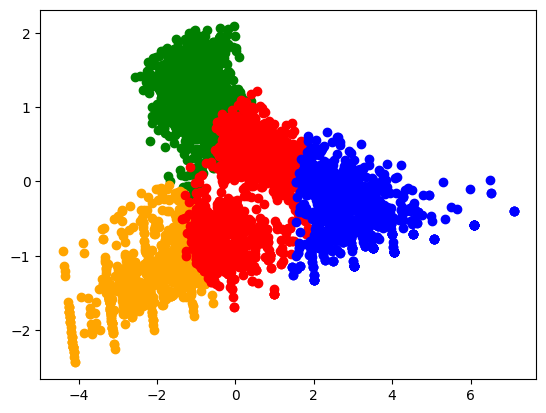

In [52]:
import matplotlib.pyplot as plt

color = ['red', 'orange', 'green', 'blue']

# 2집단 : 빨강
# 1집단 : 주황
# 0집단 : 초록
# 3집단 : 파랑
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1], c=color[i])

plt.show()

### 클러스터링 결과를 바탕으로 탈퇴회원의 경향을 파악하자

In [18]:
customer_clustering = pd.concat([customer_clustering, customer], axis=1)

In [19]:
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,2,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,2,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,2,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,2,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,2,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [20]:
# 0 집단 : 계속 이용하는 회원과 탈퇴하는 회원들로 갈리는 모습
# 1 집단 : 헬스장 이용이력이 집단들 중 가장 낮고 탈퇴율이 가장 높다
# 2 집단 : 꾸준히 헬스장을 이용하는 회원
# 3 집단 : 헬스장 처음 온 회원
# 2, 3 집단의 탈퇴율이 낮고, 0, 1 집단의 탈퇴 회원 수가 각각 543명, 771명인 모습, 1 집단의 경우 전원 탈퇴했다
# 0 ~ 3 그룹의 탈퇴 여부(0:탈퇴O, 1:탈퇴X) 수 확인
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,791
1,0,1,543
2,1,1,771
3,2,0,1231
4,2,1,18
5,3,0,820
6,3,1,18


### 다음달의 이용횟수 예측을 위해 데이터를 준비

In [21]:
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [22]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

In [23]:
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [24]:
uselog_months = uselog.groupby(["연월", 'customer_id'],as_index=False).count()

In [25]:
# usedate : 0 ~ 6 / 월요일 : 0, 화요일 : 1 ... 일요일 : 6
uselog_months

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [26]:
# 고객이 연월에 몇번 사용했는지의 데이터
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [27]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame()

In [28]:
year_months

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [29]:
# 6부터 11까지 len(year_months) = 12
for i in range(6, len(year_months)):
    # 2018년 10월부터 2019년 3월까지의 데이터만
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    # count 칼럼 이름 변경
    tmp = tmp.rename(columns={"count":"count_pred"})

    # 1부터 6까지
    for j in range(1, 7):
        # 6개월 전부터 1개월 전까지
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
        tmp_before = tmp_before.rename(columns={"count":"count_{}".format(j-1)})
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

    # 6개월 전부터 1개월 전까지 데이터 결합
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

# count_0 : 1개월 전 이용횟수, count_1 : 2개월 전 이용횟수...

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [30]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18310 entries, 0 to 18309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연월           18310 non-null  object 
 1   customer_id  18310 non-null  object 
 2   count_pred   18310 non-null  int64  
 3   count_0      17793 non-null  float64
 4   count_1      17253 non-null  float64
 5   count_2      16711 non-null  float64
 6   count_3      16174 non-null  float64
 7   count_4      15667 non-null  float64
 8   count_5      15113 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [31]:
# Nan있는 데이터 버리기
predict_data = predict_data.dropna()

In [32]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
5,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
7,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
18304,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [33]:
# reset_index(drop=True) : True로 설정하면 기존 인덱스를 데이터프레임의 열로 추가하지 않고 제거합니다
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


### 특징이 되는 변수 추가

In [34]:
# 등록 일자 추가
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [35]:
# 데이터 타입 변경
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

In [36]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01


In [37]:
# dateutil.relativedelta : 날짜와 시간 간의 상대적인 차이를 계산할 수 있는 기능을 제공
from dateutil.relativedelta import relativedelta

In [38]:
# period : 기간
predict_data["period"] = None

In [39]:
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data.iloc[i, -1] = delta.years*12 + delta.months
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [40]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]

In [41]:
# 선형 모델
from sklearn import linear_model
import sklearn.model_selection

# 선형 회귀
model = linear_model.LinearRegression()

In [42]:
# X = 1개월 전 부터 6개월 전까지 이용횟수
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
# y = 이번달에 이용횟수
y = predict_data["count_pred"]

In [43]:
# 학습 데이터, 훈련 데이터 나누기
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, shuffle=True)
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# 예측 확률 60% 정도
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5996788208694339
0.6300652362008613


### 모델에 기여하는 변수 확인

In [45]:
# 전 달에 같은 요일에 이용한 횟수가 가장 영향을 많이 끼침, 등록 기간은 거의 영향을 못끼친 모습
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.315072
1,count_1,0.206793
2,count_2,0.159160
3,count_3,0.197228
4,count_4,0.079003
5,count_5,0.057033
6,period,0.064135


In [46]:
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [47]:
model.predict(x_pred)

c:\Users\YoonSunJun\anaconda3\envs\churn\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.80519425, 1.95264753])

In [48]:
uselog_months.to_csv("use_log_months.csv",index=False, encoding="cp949")